<a href="https://colab.research.google.com/github/eduvaladao/aulas_bigdata_astro_CBPF/blob/main/aula04_CBPF_hubbleConstant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

<font size="5"> Calculando a constante de Hubble
    
<font size="2">
    
This solution was developed by Bernardo Fraga and Luciana Dias for the XIII Escola do CBPF - Curso de Introdução a Cosmologia com Python prof. Clécio R. Bom
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>
    
**Contact:** bernardo@cbpf.br</font>

<font size="2">

Please do not remove this disclaimer.</font>

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
#!pip install scipy
import scipy.optimize as optimization # The scipy.optimize package provides several commonly used optimization algorithms.
# ver 'https://docs.scipy.org/doc/scipy/tutorial/optimize.html#optimization-scipy-optimize'.
from sklearn.linear_model import LinearRegression # Ordinary least squares Linear Regression.
# ver 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'.

# Read text data from a file and plot them.
The first step in the present work is not directly related to the statistics problem at hand, but it is quite important: you have to learn how to read in a text file. There are two you can use: hubble_low_z.dat and hubble.dat. The files are lists of supernovae with 3 facts about each: the redshift z, which for our purposes is the recession velocity divided by c (this is true only to leading order in v/c); the distance d in Mpc; and the measurement error on distance, delta-d (also in Mpc). Mpc, or megaparsecs, are the typical distance units in cosmology, equal to 3,261,560 light years.

Example adapted from: https://physics.princeton.edu//~phy209/week4/index.html



In [18]:
!ls
if not os.path.exists("hubble.zip"): # vê se o path existe, ver 'https://www.geeksforgeeks.org/python-os-path-exists-method/'.
  !wget https://clearskiesrbest.files.wordpress.com/2021/08/hubble.zip
  !unzip hubble.zip
!ls

drive		  hubble_original_data.txt  hubble.zip
hubble_low_z.txt  hubble.txt		    sample_data
drive		  hubble_original_data.txt  hubble.zip
hubble_low_z.txt  hubble.txt		    sample_data


In [19]:
light_speed = 299792.458 # km/s

In [20]:
# solution to reading 3-column data from a text file.
# The function reads in the columns and returns a tuple of 3
# numpy arrays.
#
# Usage is:
# z,d,e = read_hubble_data('hubble_low_z.dat')
#
# It is not very general.  Would you know what to do if the # of
# columns weren't given in advance??

def read_hubble_data(filename):
    """ Open a 3-column file of hubble data """

    datafile = open(filename, 'r')  # 2nd argument says open for reading, ver 'https://www.w3schools.com/python/ref_func_open.asp'.

    z, d, derr = [], [], []            # criando listas vazias.
    for line in datafile:              # Iterating over a file goes line-by-line.
        (a,b,c) = line.split()         # split() breaks text (string) at whitespace and transforms it into a list, ver 'https://www.w3schools.com/python/ref_string_split.asp'.
        z.append(float(a))             # transformando o item 'a' da lista anterior em float e o adicionando a lista z.
        d.append(float(b))
        derr.append(float(c))

    datafile.close()                   # Close the data file, ver 'https://www.w3schools.com/python/ref_file_close.asp'.
    return np.array(z), np.array(d), np.array(derr)   # transforma as listas anterioes em numpy arrays.



In [21]:
z_low,d_low,derr_low = read_hubble_data('hubble_low_z.txt')
z_all,d_all,derr_all = read_hubble_data('hubble.txt')

In [22]:
hubble_original = np.genfromtxt('hubble_original_data.txt', delimiter=',', skip_header=1, usecols=(1,2)) # Load data from a text file, with missing values handled as specified.
# ver 'https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html'.
# delimiter = The string used to separate values.
# skip_header = The number of lines to skip at the beginning of the file.
# usecols = Which columns to read, with 0 being the first.
d_hubble = hubble_original[1:, 0] # Pega o elemento de índice 0 (primeira "coluna") das "rows" de índice 1 (segunda "row") até o final (1:).
v_hubble = hubble_original[1:, 1] # Pega o elemento de índice 1 (segunda "coluna") das "rows" de índice 1 (segunda "row") até o final (1:).
d_hubble_good = d_hubble[v_hubble > 0] 
v_hubble_good = v_hubble[v_hubble > 0] # cria um novo array (filtering) a partir dos elementos de v_hubble que sejam maior que zero.
# ver 'https://www.w3schools.com/python/numpy/numpy_array_slicing.asp'.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


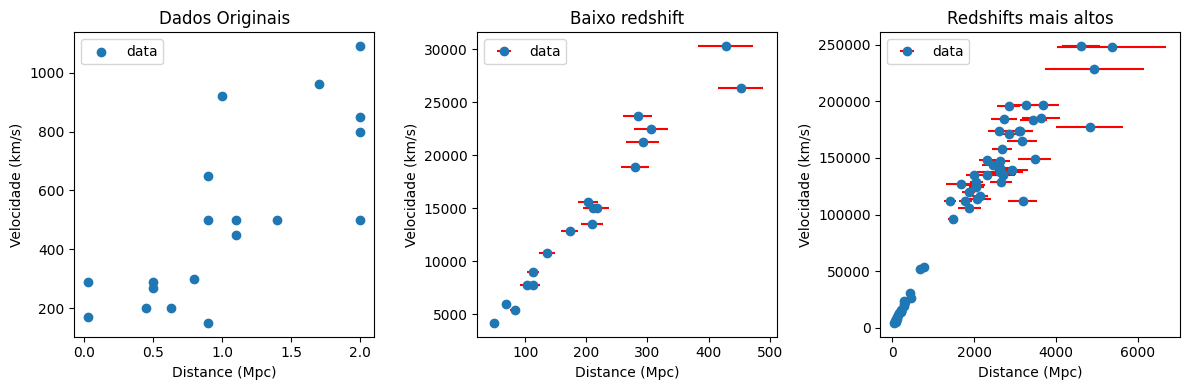

In [29]:
# Notice three new features this week
# 1. plotting errorbars instead of just points or lines
# 2. plotting a function (any valid python or scipy expression depending on x)
# 3. drawing to a file.

plt.style.use('default') # ver 'https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html'.
#plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))   # ver 'https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html'.
axes[0].scatter(d_hubble_good, v_hubble_good, label="data")  # A scatter plot of v_hubble_good vs. d_hubble_good with varying marker size and/or color.
# ver 'https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html'.
axes[0].set_ylabel('Velocidade (km/s)')                      # y axis title. 
axes[0].set_xlabel('Distance (Mpc)')                         # x axis title.
axes[0].set_title('Dados Originais')                         # overall title.
#ax[0].plot(d_hubble,70*d_hubble, color='green', label="theory curve")     # Overplot a theory curve
axes[0].legend(loc='upper left')                             # localização da legenda.

axes[1].errorbar(d_low, z_low*light_speed, xerr=derr_low, ecolor='r', fmt='o', label="data") # Plot z_low*light_speed versus d_low as lines and/or markers with attached errorbars.
# ver 'https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html'.
# d_low, z_low*light_speed define the data locations, xerr, yerr define the errorbar sizes. By default, this draws the data markers/lines as well the errorbars. Use fmt='none' to draw errorbars without any data markers.
# ecolor = The color of the errorbar lines.
# fmt = The format for the data points / data lines. ver 'https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot'.
# label = legenda.
axes[1].set_ylabel('Velocidade (km/s)')                   
axes[1].set_xlabel('Distance (Mpc)')              
axes[1].set_title('Baixo redshift') 
#ax[1].plot(d_low,70*d_low, color='green', label="theory curve")     # Overplot a theory curve
axes[1].legend(loc='upper left')

axes[2].errorbar(d_all, z_all*light_speed, xerr=derr_all, ecolor='r', fmt='o', label="data") 
axes[2].set_ylabel('Velocidade (km/s)')                   
axes[2].set_xlabel('Distance (Mpc)')              
axes[2].set_title('Redshifts mais altos') 
#ax[2].plot(d_all,70*d_all, color='green', label="theory curve")     # Overplot a theory curve
axes[2].legend(loc='upper left')
plt.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# ver 'https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html'.
#plt.show()
plt.savefig('/content/drive/MyDrive/Hubble_scatterplots.png')

# Least-squares in Python

Example adapted from: https://python4mpia.github.io/fitting_data/least-squares-fitting.html

In [30]:
def linear(x, a):
    return a*x

In [52]:
# This outputs the actual parameter estimate (a, b, c) and the 3x3 covariance matrix.
# Initial guess.

x0 = np.array([40]) # cria um array com o integer 40.
params_original, covariance_matrix = optimization.curve_fit(linear, d_hubble_good, v_hubble_good, x0) # Uses non-linear least squares to fit a function, f = linear in this case, to (xdata = d_hubble_good, ydata = v_hubble_good).
# ver 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html'.
# x0 = Initial guess for the parameters.
# Assumes ydata = f(xdata, *params) + eps.
# Returns popt = Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
# Returns pcov = The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
#model_original = LinearRegression(fit_intercept=False).fit(d_hubble_good.reshape(-1,1), v_hubble_good)
# ver 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'.
#params = np.polyfit(d_hubble_good, v_hubble_good, 1, full=True)
# ver 'https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html'.
#print(params)

# covariance_matrix[0,0] é a variância de a = H0. np.sqrt(covariance_matrix[0, 0] é o desvio padrão (incerteza) de a.)
print('H0 com dados originais = {:4.2f} +- {:4.2f} km/s/Mpc'.format(params_original[0], np.sqrt(covariance_matrix[0,0]))) # formatação com duas casas decimais.
# ver 'https://www.geeksforgeeks.org/python-string-format-method/'.
# ver 'https://docs.python.org/3/library/string.html#grammar-token-format-string-format_spec'.
#print('H0 com dados originais = {:4.2f} km/s/Mpc'.format(model_original.coef_[0]))

H0 com dados originais = 446.47 +- 37.93 km/s/Mpc


In [53]:
#model_low = LinearRegression(fit_intercept=False).fit(d_low.reshape(-1,1), z_low * light_speed)
params_low, covariance_matrix_low = optimization.curve_fit(linear, d_low, z_low*light_speed, x0)
# ver 'https://stackoverflow.com/questions/26058792/correct-fitting-with-scipy-curve-fit-including-errors-in-x'.
print('H0 com dados de baixo redshift = {:4.2f} +- {:4.2f} km/s/Mpc'.format(params_low[0], np.sqrt(covariance_matrix_low[0,0])))

H0 com dados de baixo redshift = 69.80 +- 1.79 km/s/Mpc


In [54]:
#model_all = LinearRegression(fit_intercept=False).fit(d_all.reshape(-1,1), z_all * light_speed)
#print('H0 com dados todos os redshift = {:4.2f} km/s/Mpc'.format(model_all.coef_[0]))
params_all, covariance_matrix_all = optimization.curve_fit(linear, d_all, z_all*light_speed, x0)
print('H0 com dados de alto redshift = {:4.2f} +- {:4.2f} km/s/Mpc'.format(params_all[0], np.sqrt(covariance_matrix_all[0,0])))

H0 com dados de alto redshift = 52.95 +- 1.15 km/s/Mpc


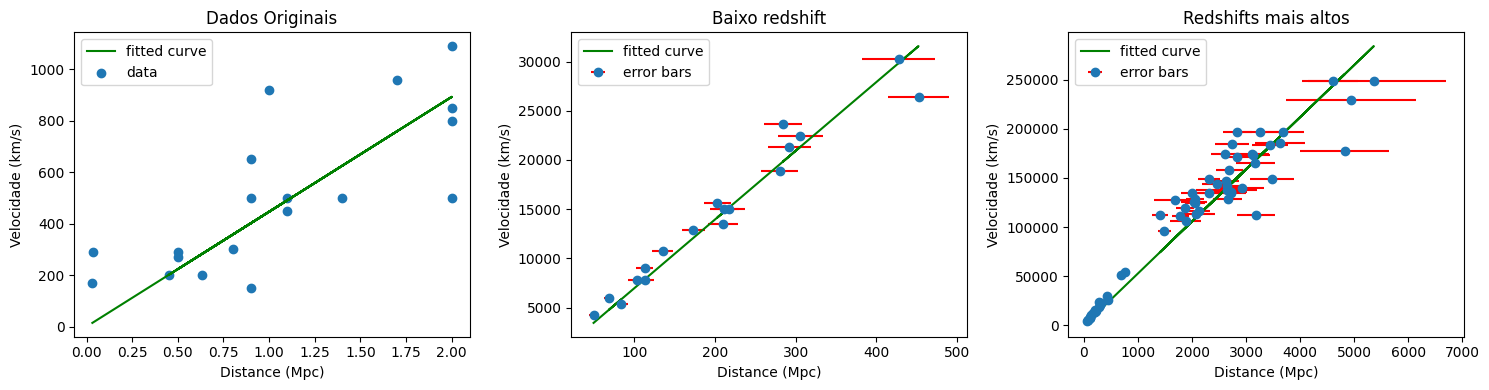

In [55]:
plt.style.use('default')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[15,4])


axes[0].scatter(d_hubble_good, v_hubble_good, label="data")  # Error bars. Circles at points. No line.
axes[0].set_ylabel('Velocidade (km/s)')                      # Axis title and overall title.
axes[0].set_xlabel('Distance (Mpc)')              
axes[0].set_title('Dados Originais') 
axes[0].plot(d_hubble_good, params_original[0]*d_hubble_good, color='green', label="fitted curve") # Overplot a theory curve.
axes[0].legend(loc='upper left')

axes[1].errorbar(d_low, z_low*light_speed, xerr=derr_low, ecolor='r', fmt='o', label="error bars") # Error bars. Circles at points. No line.
axes[1].set_ylabel('Velocidade (km/s)')                                                            # Axis title and overall title.
axes[1].set_xlabel('Distance (Mpc)')              
axes[1].set_title('Baixo redshift') 
axes[1].plot(d_low, params_low[0]*d_low, color='green', label="fitted curve")  # Overplot a theory curve.
axes[1].legend(loc='upper left')

axes[2].errorbar(d_all, z_all*light_speed, xerr=derr_all, ecolor='r', fmt='o', label="error bars") # Error bars. Circles at points. No line.
axes[2].set_ylabel('Velocidade (km/s)')                                                            # Axis title and overall title.
axes[2].set_xlabel('Distance (Mpc)')              
axes[2].set_title('Redshifts mais altos') 
axes[2].plot(d_all, params_all[0]*d_all, color='green', label="fitted curve")  # Overplot a theory curve.
axes[2].legend(loc='upper left')

plt.tight_layout()
#plt.show()
plt.savefig('/content/drive/MyDrive/Hubble_fittingplots.png')

# Exercício: Derive your Hubble constant from several datasets (já feito acima)

In [ ]:
# É possível ler os arquivos txt no começo do notebook por meio do pandas
# ver 'https://www.geeksforgeeks.org/how-to-read-text-files-with-pandas/'.